### What is known about transmission, incubation, and environmental stability?  
##### COVID-19 Open Research Dataset Challenge (CORD-19)

https://www.youtube.com/watch?v=S6GVXk6kbcs

In [75]:
import os 
import pandas as pd
import json
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

import heapq


In [344]:
#, 'comm_use_subset', 'custom_license', 'noncomm_use_subset'
dirs = ['biorxiV_medrxiv', 'comm_use_subset', 'custom_license', 'noncomm_use_subset']

docs = []
for d in dirs:
    print(d)
    for file in tqdm(os.listdir(f"{d}/{d}")):
#         print(file)
        filepath = f"{d}/{d}/{file}"
        j = json.load(open(filepath,'rb'))
#         print(j['metadata'])
        title = j['metadata']['title']
#         print(j.keys())
        try: 
            abstract = j['abstract'][0]['text']
        except:
            abstract = ''
            
        fulltext = ''
        for text in j['body_text']:
            fulltext += text['text'] + "\n\n"
#         print(fulltext)
        docs.append([title, abstract, fulltext])


  7%|▋         | 64/885 [00:00<00:01, 636.66it/s]

biorxiV_medrxiv


  1%|          | 57/9118 [00:00<00:16, 562.85it/s]

comm_use_subset


  0%|          | 60/16959 [00:00<00:28, 590.53it/s]

custom_license


  3%|▎         | 73/2353 [00:00<00:03, 723.34it/s]

noncomm_use_subset


100%|██████████| 2353/2353 [00:03<00:00, 641.27it/s]


In [345]:
df = pd.DataFrame(docs, columns = ['title', 'abstract', 'fulltext'])
df.head()

,title,abstract,fulltext
0,Multimerization of HIV-1 integrase hinges on c...,New anti-AIDS treatments must be continually d...,"In the absence of a curative treatment, the hi..."
1,Time-varying transmission dynamics of Novel Co...,Rationale: Several studies have estimated basi...,"Eighteen years ago, severe acute respiratory s..."
2,p53 is not necessary for DUX4 pathology,Summary Statement: DUX4 is thought to mediate ...,Facioscapulohumeral muscular dystrophy (FSHD) ...
3,Virological assessment of hospitalized cases o...,"emerged in late 2019 1,2 . Initial outbreaks i...",Pharyngeal virus shedding was very high during...
4,Potential impact of seasonal forcing on a SARS...,A novel coronavirus (SARS-CoV-2) first detecte...,(2.2 with 90% high density interval 1.4-3.8 (R...


In [346]:
fulltexts = df['fulltext'].values

In [347]:
coronavirus = 0
CoV = 0
COVID= 0
coronav=0
SARS2 = 0
for text in fulltexts:
    coronavirus += text.count('coronavirus')
    CoV += text.count('CoV')
    COVID += text.count('COVID')
    coronav += text.count('coronav')
    SARS2 += text.count('SARS2')

print('Number of: ')
print(f'coronavirus {coronavirus}')
print(f'CoV {coronavirus}')
print(f'COVID {coronavirus}')
print(f'corona virus {coronav}')
print(f'SARS2 {coronavirus}')

Number of: 
coronavirus 62080
CoV 62080
COVID 62080
corona virus 63395
SARS2 62080


### Range of Incubation periods

In [348]:
incubation = df[df['fulltext'].str.contains('incubation')]
incubation.head()

,title,abstract,fulltext
1,Time-varying transmission dynamics of Novel Co...,Rationale: Several studies have estimated basi...,"Eighteen years ago, severe acute respiratory s..."
4,Potential impact of seasonal forcing on a SARS...,A novel coronavirus (SARS-CoV-2) first detecte...,(2.2 with 90% high density interval 1.4-3.8 (R...
13,A Multiscale and Comparative Model for Recepto...,The respiratory syndrome caused by a new type ...,The coronavirus disease 2019 has emerged at th...
20,Real-Time Estimation of the Risk of Death from...,The exported cases of 2019 novel coronavirus i...,"Since 8 December, 2019, clusters of pneumonia ..."
24,Title Analysis of the epidemic growth of the e...,"Background: On January 23, 2020, a quarantine ...","On December 31, 2019, the Health Commission in..."


In [349]:
incubation_texts = incubation['fulltext'].values

In [350]:
len(incubation_texts)

8142

In [351]:
incubation_times = []
for t in incubation_texts:
    for sentence in t.split('. '):
        if 'incubation' in sentence:
#             print(sentence)
            single_day = re.findall(r" \d{1,2} day", sentence)
            
            if len(single_day) == 1:
                num = single_day[0].split(" ")
                incubation_times.append(float(num[1]))
#                 print(single_day[0])
#                 print(sentence)
#                 print()
#                 print()
            
print(len(incubation_times))

1668


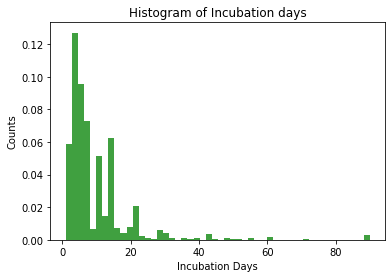

In [352]:
n, bins, patches = plt.hist(incubation_times, 50, density = True, facecolor='g', alpha=0.75)
plt.xlabel('Incubation Days')
plt.ylabel('Counts')
plt.title('Histogram of Incubation days')
plt.show()

## NLP summarizer
https://stackabuse.com/text-summarization-with-nltk-in-python/

In [354]:
import re
import nltk

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def clean_text(text):
    # Removing Square Brackets and Extra Spaces
    text = re.sub(r'\[[0-9]*\]',' ', text)
    text = re.sub(r'\s+',' ', text)
 
    text = re.sub(r'\{\{[\s\S]*?\}\}', '', text)

    # Remove doi links
    #text = re.sub(r'^https://$', '',text)
    return text

def clean_spchar_digs(text):
    # Removing special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', text )
    text = re.sub(r'\s+', ' ', text)
    
    return text

def word_freq(formatted_text):
    #creates a dictionary of words as keys and frequency as values
    word_frequencies = {}
    for word in nltk.word_tokenize(formatted_text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequency = max(word_frequencies.values())
    #divides the values by the maximum frequency
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
    
    return word_frequencies

def sent_scores(sentence_list, word_frequencies):
    #uses the word frequencies to score the sentences by adding up the scores
    #of the words that make up the sentence
    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) <60: #limits sentence to less than 60 words
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]
                    
    return sentence_scores

def get_summary(dirty_text):
    text = clean_text(dirty_text)
    formatted_text = clean_spchar_digs(text)

    sentence_list = nltk.sent_tokenize(text)

    word_frequencies = word_freq(formatted_text) 
    sentence_scores = sent_scores(sentence_list,word_frequencies)
    
    
    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get) #first value is number highest scoring sentences to print
    summary = '\n\n '.join(summary_sentences)
    return summary

### Seasonality

In [358]:
season = df[df['fulltext'].str.contains('season')]
season.head()

,title,abstract,fulltext
4,Potential impact of seasonal forcing on a SARS...,A novel coronavirus (SARS-CoV-2) first detecte...,(2.2 with 90% high density interval 1.4-3.8 (R...
7,Excess cases of Influenza like illnesses in Fr...,Several French regions where COVID19 has been ...,Influenza Like illnesses cases are defined as ...
10,Projecting the end of the Zika virus epidemic ...,International Concern following a cluster of a...,"Starting as early as 2013, 1 has since spread ..."
36,Far-UVC light: A new tool to control the sprea...,Airborne-mediated microbial diseases such as i...,Airborne-mediated microbial diseases represent...
41,Effects of temperature variation and humidity ...,Object Meteorological parameters are the impor...,"In December 2019, a novel coronavirus disease ..."


In [359]:
season_texts = season['fulltext'].values

In [360]:
season_data = ''
for t in season_texts:
    for sentence in t.split('. '):
        if 'season' in sentence:
            if 'winter' in sentence or 'summer' in sentence or 'fall' in sentence or 'spring' in sentence:
#                 print(sentence)
#                 print()
#                 print()
                    season_data += ' ' + sentence

In [388]:
season_result = get_summary(season_data)

### Immunity

In [386]:
from re import search
immunity_text = ''
for text in fulltexts:
    for sentence in text.split('. '):
        if ('immunity' in sentence or 'immune' in sentence) and ('Cov' in sentence or 'Covid' in sentence or 'COVID' in sentence or 'corona virus' in sentence):
#             print(sentence)
#             print()
#             print()
            immunity_text += ' ' + sentence

In [387]:
immunity_result = get_summary(immunity_text)

Derivation of monoclonal anti-idiotype antibodies to an antigen-specific bovine monocl onal antibody Jerne (1974) proposed a network theory of the immune system in which idiotypes and anti-idiotypes play a central regulatory role Other suspected, but not well-documented, agents which can provoke immune complex vasculitis include streptococcal infection, herpes virus infection, equine infectious anaemia virus, and canine corona virus .

 We discussed the dynamic characteristics of host immune system and the imbalance of gut microbiota in 3 critical patients with COVID-2019 https://doi.org/10.1101/2020.03.03.20030650 doi: medRxiv preprint severity was closely related with host immune cell levels, and the vicious circle between immune disorder and gut microbiota imbalance may be a high risk of fatal pneumonia.

 CD4 + T cells play a pivotal role in regulating immune responses, orchestrating the deletion 3 7 7 and amplification of immune cells, especially CD8 + T cells Here, we focus on in

### Role of Environment 

In [384]:
enviro_data = ''
for text in fulltexts:
    for sentence in text.split('. '):
        if ('environment' in sentence or 'environmental stability' in sentence) and ('Cov' in sentence or 'Covid' in sentence or 'COVID' in sentence or 'corona virus' in sentence):
#             print(sentence)
#             print()
#             print()
            enviro_data += ' ' + sentence

In [385]:
enviro_result = get_summary(control_data)

In addition to population mobility and human-to-human contact, environmental factors can impact droplet transmission and survival of viruses (e.g., influenza) but have not yet been examined for this novel pathogen In order to identify the sta- Table 1 : Relationship between local exponential growth, log(R proxy ), and environmental factors (i.e., absolute humidity and temperature).

 This investigation showed that the hospital environment frequently becomes contaminated when providing care to COVID-19 patients A lack of resources also meant that we were unable to conduct 1 3 These findings emphasize the need to ensure adequate environmental cleaning, strengthen infection prevention training, and improve infection prevention precautions among HCWs during the outbreak of COVID-19.

 Evidence exists that each of these routes of transmission is possible: symptomatic ( 8 ) , pre-symptomatic ( 9 ) ; asymptomatic ( 10 ) ; and environmental ( 8 ) 23.20026690 doi: medRxiv preprint cells formed 

### History 

In [382]:
history_data = ''
for text in fulltexts:
    for sentence in text.split('. '):
        if ('history' in sentence or 'natural history' in sentence or 'diagnostics' in sentence) and ('Cov' in sentence or 'Covid' in sentence or 'COVID' in sentence or 'corona virus' in sentence):
#             print(sentence)
#             print()
#             print()
            history_data += ' ' + sentence

In [383]:
history_result = get_summary(history_data)

In the 853 confirmed COVID-19 patients, 199 cases reported their contact history, in which 172 patients (86.43%) had a history of having been to Hubei or living in Hubei, 19 patients (9.55%) had a history of contacting confirmed cases, 8 patients (4.02%) had a history of contacting people who were from Hubei ( Figure 6 ).

 We collected all publicly available information of confirmed COVID-19 patients in Hefei and Shenzhen, including sex, age, travel history, information of contact with patients with similar symptoms or confirmed COVID-19, symptoms related to SARS-CoV-2 infection and time when these symptoms first appeared, and time of conformation of COVID-19.

 We used WHO training material for the detection, prevention, response, and control of COVID-19 to develop a validated questionnaire first reported 41 COVID-19 cases, most of whom had a history of exposure to Huanan Seafood Wholesale Market Secondary outcomes included the history of epidemiology of CML patients, the clinical ch

### What do we know about natural history, transmission, and diagnostics for the virus?

Implementation of diagnostics and products to improve clinical processes
Disease models, including animal models for infection, disease and transmission
Tools and studies to monitor phenotypic change and potential adaptation of the virus

In [374]:
pheno_data = ''
for text in fulltexts:
    for sentence in text.split('. '):
        if ('phenotypic change' in sentence or 'adaptation' in sentence) and ('Cov' in sentence or 'Covid' in sentence or 'COVID' in sentence):
#             print(sentence)
#             print()
#             print()
            pheno_data += ' ' + sentence
# 'personal' in sentence or 'protective' in sentence or 'equipment' in sentence or 'PPE' in sentence

In [375]:
adapt_result = get_summary(pheno_data)

Patients with COVID-19 show clinical manifestations include fever, nonproductive cough, dyspnea, myalgia, fatigue, normal or decreased leukocyte counts, and radiographic evidence of pneumonia , which are similar to the symptoms of SARS-CoV and MERS-CoV infections We outline some of the core dimensions of these resilient health systems 4 and their responses to the COVID-19 epidemic.

  In short, the SARS virus underwent several rounds of genetic adaptation after making the leap from the civet cats to humans.


In [390]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Seasonality' + color.END)
print()
print(season_result)
print()
print(color.BOLD + 'Immunity' + color.END)
print()
print(immunity_result)
print()
print(color.BOLD + 'Role of Environment' + color.END)
print()
print(enviro_result)
print()
print(color.BOLD + 'History' + color.END)
print()
print(history_result)
print()

Seasonality

Conducting the trial during winter months will maximize the efficiency of the trial because AOM and URTI incidences are highest during that time Thus sufficient patients will be recruited during two calendar years for the intervention to take place over two winter seasons The intervention will be given during the winter season.

 Given the overlap in the winter season of these viruses in temperate areas, it is not surprising that co-infections with two or more viruses occur Therefore, contact and droplet precautions are sufficient to prevent transmission in most settings; handwashing is critical in healthcare settings during the winter season.

 The virulence, spread and type of circulating influenza strains varies from season to season.

 In our study, picornaviruses had the highest prevalence over all seasons, although other viruses such as influenza virus and RSV increased their prevalence in winter As expected, we found that influenza viruses and other viruses increase